# HW6_程式練習 (III)

這是一個關於現代奧運會的歷史資料集，包含從1896年雅典到2016年里約的所有賽事。[資料來源](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

> **請注意**：直到1992年，夏季和冬季運動會是在同一年舉行的。之後它們就分開，冬季運動會在1994年開始，然後夏季運動會在1996年，再然後是冬季運動會在1998年，以此類推。分析這些數據時，人們常犯的一個錯誤是假設夏季和冬季運動會一直都是分開的。

### 內容
資料集 `athlete_events.csv` 包含271116個橫列和15個直欄。每個橫列對應一位運動員參加一個奧運賽事。這些直欄包括：

- ID - 每個運動員的唯一編號
- Name - 運動員的名字
- Sex - 男（M）或女（F）
- Age - 年齡（整數）
- Height - 身高（以厘米為單位）
- Weight - 體重（以千克為單位）
- Team - 隊伍名稱
- NOC - 國家奧林匹克委員會的3個字母代碼
- Games - 奧運年份和賽季
- Year - 奧運年份（整數）
- Season - 奧運賽季（夏季或冬季）
- City - 主辦城市
- Sport - 運動項目
- Event - 賽事
- Medal - 獲得的獎牌（金牌、銀牌、銅牌或NA）

## 題目一：依運動項目填補缺失值 (25%)


### 📄 題目描述：

本資料集中記錄了歷年奧運運動員的基本資訊，包括身高（`Height`）與體重（`Weight`）。由於有部分資料缺失，請你嘗試根據**相同運動項目（`Sport`）**的平均身高與體重，來填補這些缺失值。

---

### ✅ 任務要求：
  1. 讀取資料集，將資料集存放在 `oly_df` 中並列印出來。
  2. 針對資料中的 `Height` 和 `Weight` 欄位進行缺失值填補。
  3. 填補方式為：
   - 依據每個 `Sport` 的非缺失資料，分別計算 `Height` 與 `Weight` 的**平均值**。
   - 將該運動項目中缺失的 `Height` 和 `Weight` 欄位，使用對應的平均值進行填補。
  4. 如果某一個運動項目中，所有選手的 `Height` 或 `Weight` 值都是缺失的，請**略過此運動項目**，**不要嘗試填補**。
  5. 請輸出以下資訊：
   - 每個 `Sport` 對應的 `Height` 與 `Weight` 平均值。
   - 補值後，`Height` 欄位中仍為缺失值的資料筆數
   - 補值後，`Weight` 欄位中仍為缺失值的資料筆數

In [ ]:
### 非台大學生請執行以下程式碼獲取資料集 ###

!gdown 1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn

### 非台大學生請執行以上程式碼獲取資料集 ###

In [ ]:
!unzip /content/athlete_events.csv.zip
!ls -l

Archive:  /content/athlete_events.csv.zip
  inflating: athlete_events.csv      
total 46092
-rw-r--r-- 1 root root 41500688 Oct  1  2019 athlete_events.csv
-rw-r--r-- 1 root root  5688662 Apr 24 05:56 athlete_events.csv.zip
drwxr-xr-x 1 root root     4096 Apr 22 13:37 sample_data


In [ ]:
import pandas as pd

In [ ]:
oly_df = pd.read_csv('/content/athlete_events.csv')
oly_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# prompt: 任務要求：
# 讀取資料集，將資料集存放在 oly_df 中並列印出來。
# 針對資料中的 Height 和 Weight 欄位進行缺失值填補。
# 填補方式為：
# 依據每個 Sport 的非缺失資料，分別計算 Height 與 Weight 的平均值。
# 將該運動項目中缺失的 Height 和 Weight 欄位，使用對應的平均值進行填補。
# 如果某一個運動項目中，所有選手的 Height 或 Weight 值都是缺失的，請略過此運動項目，不要嘗試填補。
# 請輸出以下資訊：
# 每個 Sport 對應的 Height 與 Weight 平均值。
# 補值後，Height 欄位中仍為缺失值的資料筆數
# 補值後，Weight 欄位中仍為缺失值的資料筆數

# Assuming oly_df is already loaded as in the provided code

# Calculate the mean Height and Weight for each sport
sport_means = oly_df.groupby('Sport')[['Height', 'Weight']].mean()

# Iterate through each sport and fill missing values
for sport, means in sport_means.iterrows():
  if not pd.isna(means['Height']) and not pd.isna(means['Weight']):
    oly_df.loc[(oly_df['Sport'] == sport) & (oly_df['Height'].isna()), 'Height'] = means['Height']
    oly_df.loc[(oly_df['Sport'] == sport) & (oly_df['Weight'].isna()), 'Weight'] = means['Weight']

# Print the mean Height and Weight for each sport
print(sport_means)

# Print the number of missing values after imputation
print("\nMissing Height values after imputation:", oly_df['Height'].isna().sum())
print("Missing Weight values after imputation:", oly_df['Weight'].isna().sum())


                      Height     Weight
Sport                                  
Aeronautics              NaN        NaN
Alpine Skiing     173.489052  72.068110
Alpinism                 NaN        NaN
Archery           173.203085  70.011135
Art Competitions  174.644068  75.290909
...                      ...        ...
Tug-Of-War        182.480000  95.615385
Volleyball        186.994822  78.900214
Water Polo        184.834648  84.566446
Weightlifting     167.824801  78.726663
Wrestling         172.358586  75.495570

[66 rows x 2 columns]

Missing Height values after imputation: 209
Missing Weight values after imputation: 217


## 題目二：統計各國獎牌數量（25%）

### 📄 題目描述：

本資料集中包含了運動員參加比賽的紀錄，其中 `Medal` 欄位記錄了選手是否獲得獎牌（金、銀、銅），`NOC` 欄位表示國家或地區的代碼（例如 USA、CHN、JPN 等）。

請你統計出**每個國家**獲得的金牌、銀牌、銅牌，以及總獎牌數，並依據總獎牌數進行排序（由高至低）。

---

### ✅ 任務要求：

1. 以 `NOC` 為單位，統計該國獲得的：
   - 金牌（`Medal == "Gold"`）
   - 銀牌（`Medal == "Silver"`）
   - 銅牌（`Medal == "Bronze"`）
2. 計算總獎牌數（上述三者加總）
3. 將結果依照總獎牌數 `Total` 欄位由高至低排序。
4. 輸出結果需包含以下欄位：
   - `NOC`
   - `Gold`
   - `Silver`
   - `Bronze`
   - `Total`

In [ ]:
# prompt: 題目二：統計各國獎牌數量（25%）
# 📄 題目描述：
# 本資料集中包含了運動員參加比賽的紀錄，其中 Medal 欄位記錄了選手是否獲得獎牌（金、銀、銅），NOC 欄位表示國家或地區的代碼（例如 USA、CHN、JPN 等）。
# 請你統計出每個國家獲得的金牌、銀牌、銅牌，以及總獎牌數，並依據總獎牌數進行排序（由高至低）。

# Calculate medal counts for each country
medal_counts = oly_df.groupby('NOC')['Medal'].value_counts().unstack(fill_value=0)

# Calculate total medals
medal_counts['Total'] = medal_counts.sum(axis=1)

# Sort by total medals in descending order
medal_counts = medal_counts.sort_values('Total', ascending=False)

# Display the results
medal_counts


Medal,Bronze,Gold,Silver,Total
NOC,,,,
USA,1358,2638,1641,5637
URS,689,1082,732,2503
GER,746,745,674,2165
GBR,651,678,739,2068
FRA,666,501,610,1777
...,...,...,...,...
NEP,0,1,0,1
MRI,1,0,0,1
TOG,1,0,0,1


## 題目三：找出參賽人數最多的運動項目（25%）

### ✅ 任務要求：

1. 資料預處理：
  - 移除重複的參賽者紀錄（提示：可使用 `ID`、`Year` 和 `Sport` 這三個欄位進行 `drop_duplicates()`）。

2. 資料切分：
  - 分別取出夏季奧運與冬季奧運的資料。

4. 分別計算：
  - 夏季奧運中，參賽人數最多的前 5 個運動項目
  - 冬季奧運中，參賽人數最多的前 5 個運動項目

5. 請印出這兩組熱門運動項目的名稱及對應人數

In [ ]:
# prompt: 題目三：找出參賽人數最多的運動項目（25%）
# ✅ 任務要求：
# 資料預處理：
# 移除重複的參賽者紀錄（提示：可使用 ID、Year 和 Sport 這三個欄位進行 drop_duplicates()）。
# 資料切分：
# 分別取出夏季奧運與冬季奧運的資料。
# 分別計算：
# 夏季奧運中，參賽人數最多的前 5 個運動項目
# 冬季奧運中，參賽人數最多的前 5 個運動項目
# 請印出這兩組熱門運動項目的名稱及對應人數

# Drop duplicate athlete entries based on ID, Year, and Sport
oly_df_dedup = oly_df.drop_duplicates(subset=['ID', 'Year', 'Sport'])

# Separate summer and winter Olympics data
summer_olympics = oly_df_dedup[oly_df_dedup['Season'] == 'Summer']
winter_olympics = oly_df_dedup[oly_df_dedup['Season'] == 'Winter']

# Calculate the top 5 sports with the most participants for summer Olympics
top_summer_sports = summer_olympics['Sport'].value_counts().head(5)
print("Top 5 Summer Olympic Sports:")
print(top_summer_sports)

# Calculate the top 5 sports with the most participants for winter Olympics
top_winter_sports = winter_olympics['Sport'].value_counts().head(5)
print("\nTop 5 Winter Olympic Sports:")
top_winter_sports


Top 5 Summer Olympic Sports:
Sport
Athletics    30536
Swimming     11935
Rowing       10223
Cycling       7540
Shooting      7471
Name: count, dtype: int64

Top 5 Winter Olympic Sports:


,count
Sport,
Ice Hockey,5456
Alpine Skiing,4120
Cross Country Skiing,3731
Speed Skating,2544
Bobsleigh,2345


## 題目四：畫出熱門運動項目的參與變化圖（25%）

### ✅ 任務要求：

1. 承上題，將上述統計結果畫成兩張堆疊長條圖（stacked bar chart）：
  - 圖一：夏季奧運熱門運動項目變化圖。
  - 圖二：冬季奧運熱門運動項目變化圖。


2. 視覺化要求：
  - `x` 軸為 `Year`，`y` 軸為 `No. of People Participated in Sport`
  - 每個堆疊的顏色區塊代表一個熱門運動項目
  - 圖片大小為 `(15, 6)`
  - 請為每張圖加上適當的標題，如：
    - `"Top 5 Sports Participation - Summer Olympics"`
    - `"Top 5 Sports Participation - Winter Olympics"`
  - 圖中應包含圖例（Legend），標示每種運動所代表的顏色



<Figure size 1500x600 with 0 Axes>

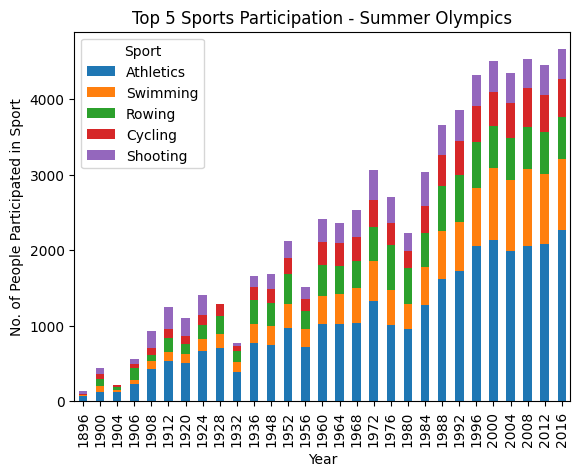

<Figure size 1500x600 with 0 Axes>

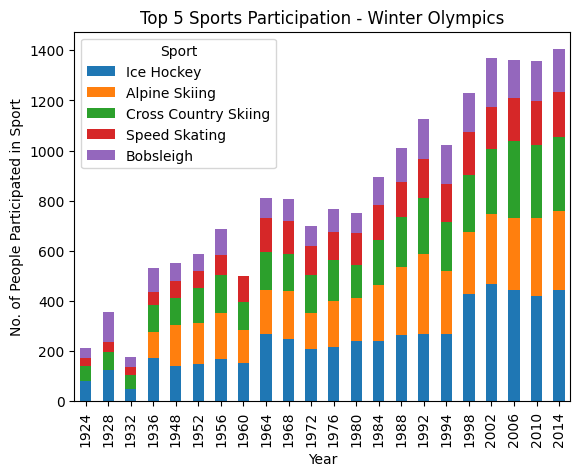

In [ ]:
# prompt: 題目四：畫出熱門運動項目的參與變化圖（25%）
# ✅ 任務要求：
# 承上題，將上述統計結果畫成兩張堆疊長條圖（stacked bar chart）：
# 圖一：夏季奧運熱門運動項目變化圖。
# 圖二：冬季奧運熱門運動項目變化圖。
# 視覺化要求：
# x 軸為 Year，y 軸為 No. of People Participated in Sport
# 每個堆疊的顏色區塊代表一個熱門運動項目
# 圖片大小為 (15, 6)
# 請為每張圖加上適當的標題，如：
# "Top 5 Sports Participation - Summer Olympics"
# "Top 5 Sports Participation - Winter Olympics"
# 圖中應包含圖例（Legend），標示每種運動所代表的顏色

import matplotlib.pyplot as plt

# Assuming top_summer_sports and top_winter_sports are already calculated as in the previous code

# Summer Olympics stacked bar chart
plt.figure(figsize=(15, 6))

# Create a pivot table to count participants for each sport in each year
summer_pivot = summer_olympics.pivot_table(index='Year', columns='Sport', values='ID', aggfunc='count', fill_value=0)

# Select the top 5 sports
top_sports_summer = summer_pivot[top_summer_sports.index]


top_sports_summer.plot(kind='bar', stacked=True)
plt.title('Top 5 Sports Participation - Summer Olympics')
plt.xlabel('Year')
plt.ylabel('No. of People Participated in Sport')
plt.legend(title='Sport')
plt.show()

# Winter Olympics stacked bar chart
plt.figure(figsize=(15, 6))

# Create a pivot table to count participants for each sport in each year
winter_pivot = winter_olympics.pivot_table(index='Year', columns='Sport', values='ID', aggfunc='count', fill_value=0)

# Select the top 5 sports
top_sports_winter = winter_pivot[top_winter_sports.index]

top_sports_winter.plot(kind='bar', stacked=True)
plt.title('Top 5 Sports Participation - Winter Olympics')
plt.xlabel('Year')
plt.ylabel('No. of People Participated in Sport')
plt.legend(title='Sport')
plt.show()
